## 42577 Introduction to Business Analytics

# **Project: Airbnb rentals data exploration challange**

##  <span style='color:green'> 1. Introduction </span> <br>

**Group members:**

**Arlinda Driza - s223712**

**Alex Dadi Reynisson - s222551**

**Bergur Astradsson - s222545**

**Simona Tican - s204703**

**Airbnb is an online marketplace focused on short-term homestays and experiences. The company is a monopoly in this market and has grown enormously in recent years.**

**For this project we will investigate the Airbnb rentals data collected inside Copenhagen area. The analysis will mainly focus on rental prices. As a starting point, our aim is to predict wehther the price of a rental is either "high" or "low" as a binary classification, and "high", "med" and, "low" as a multi class classification. In order to solve these prediction problems we will be using Logistic Regression model and Decision Tree on the dataset provided.**

**The group added data to the dataset in an attempt to improve the model with information on the nearest Metro- or S-tog station. Visualizing and rerunning the model with the new date could determine whether having a nearby station affects the price.**

##  <span style='color:green'> 2. Data analysis and Visualization </span> <br>

###  <span style='color:blue'> 2.1. Data Loading </span> <br>

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read the dataset from the CSV file
dataset = pd.read_csv('listings.csv')

###  <span style='color:blue'> 2.2. Data Visualization </span> <br>

**Lets plot the dataset with the latitude and longitude coordinates.**

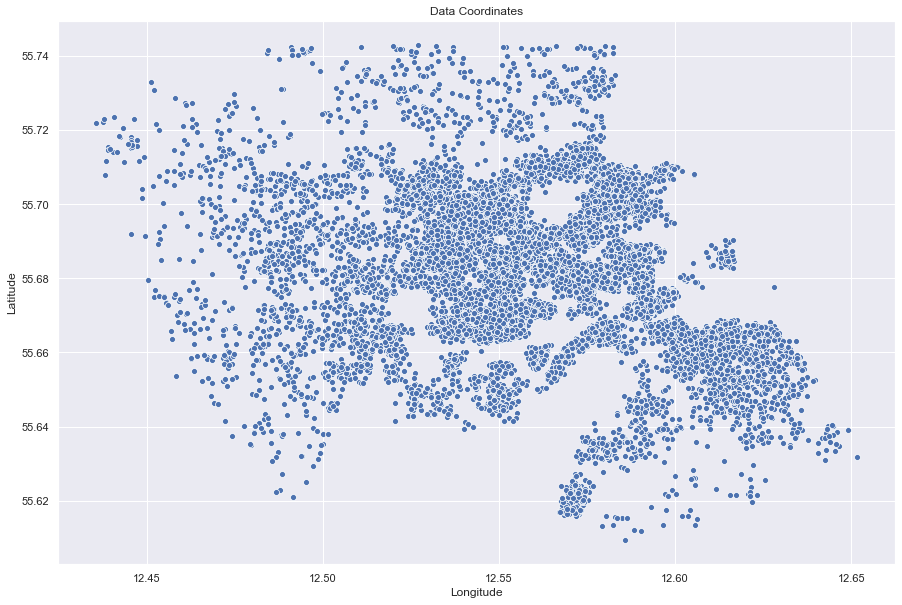

In [3]:
# Create scatter plot using latitude and longitude variables
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot( 
    x = dataset.longitude, 
    y = dataset.latitude)

plt.title('Data Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

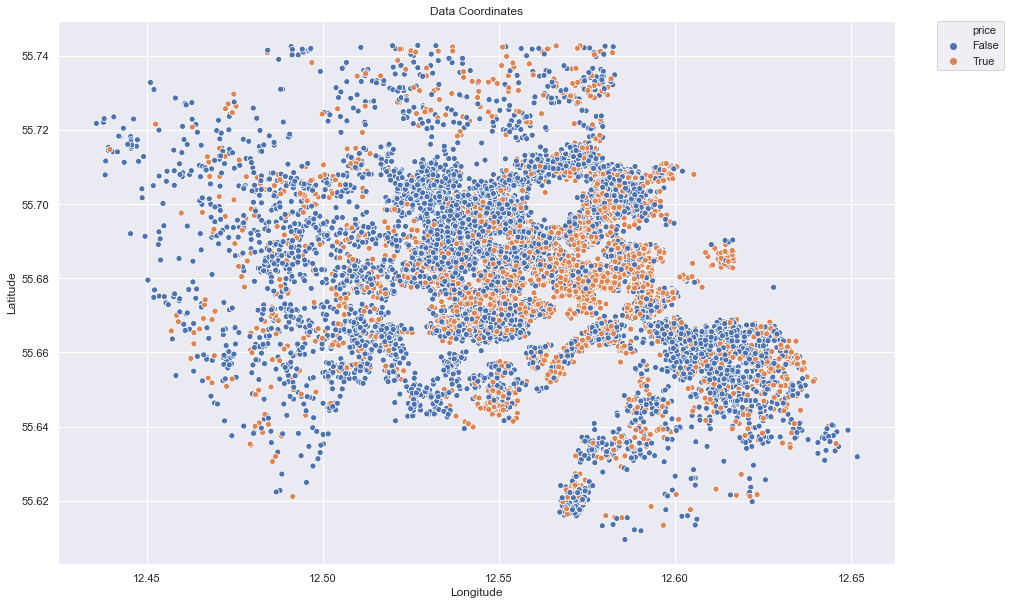

In [4]:
# Create scatter plot to classify the same variables into price below and above mean
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot( 
    x = dataset.longitude, 
    y = dataset.latitude,
    hue = dataset.price > dataset.price.mean())

plt.title('Data Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

**There is no obvious pattern for the coordinates whether the price is below or above the mean price.**

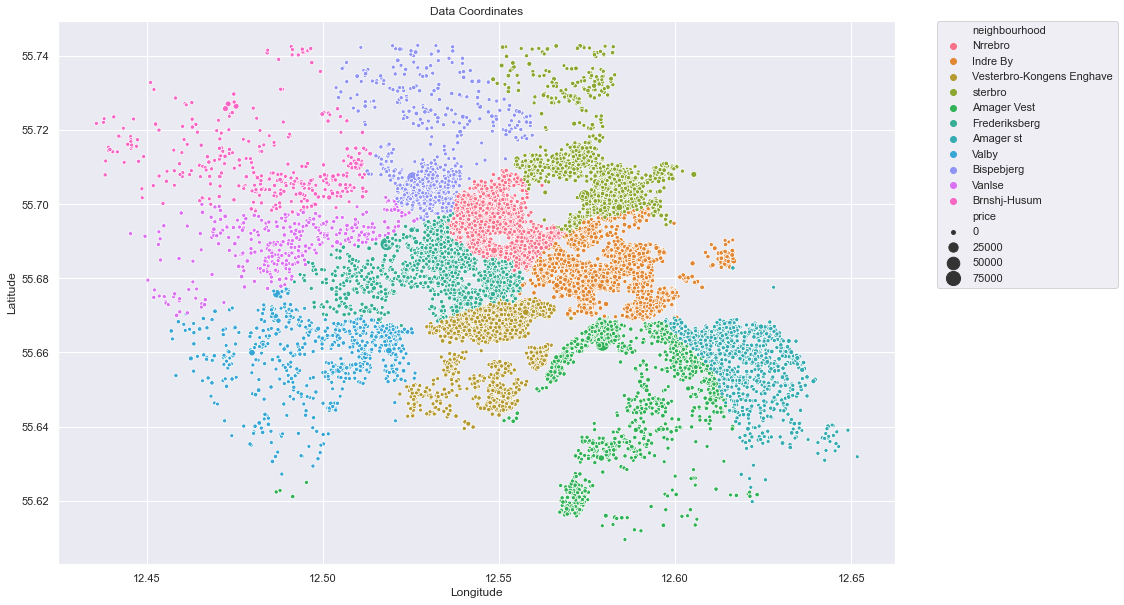

In [5]:
# Create scatter plot to classify the same variables into neighborhood and represent the price as varying points
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot( 
    x = dataset.longitude, 
    y = dataset.latitude,
    hue = dataset.neighbourhood,
    size = dataset.price, sizes = (15, 200))

plt.title('Data Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

**There is at leats one listing in each neighborhood that has a price of at least 25000.**

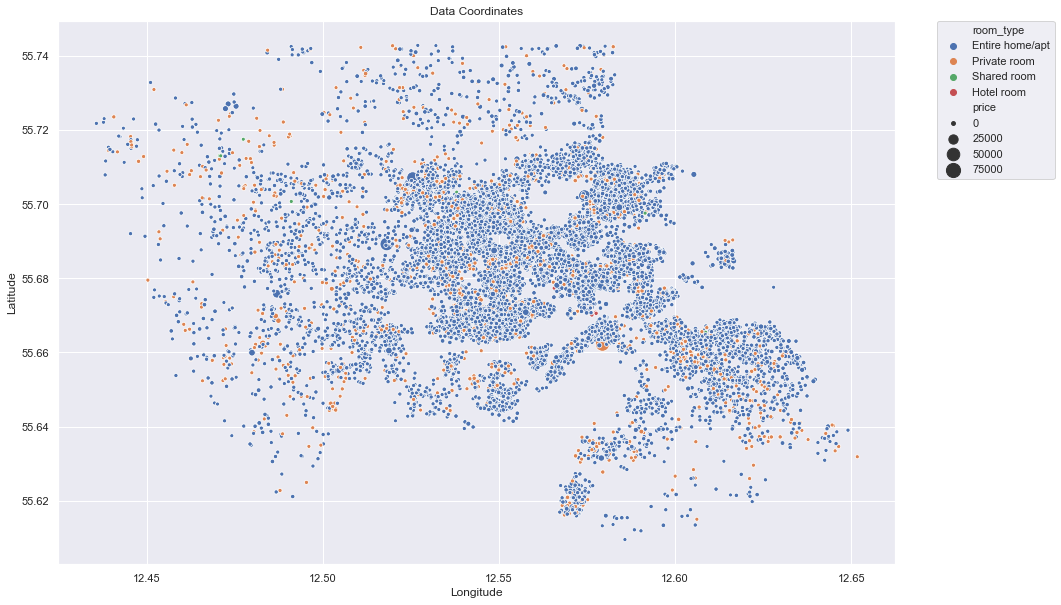

In [6]:
# Create scatter plot to classify the same variables into room type and represent the price as varying points
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot( 
    x = dataset.longitude, 
    y = dataset.latitude,
    hue = dataset.room_type,
    size = dataset.price, sizes = (15, 200))

plt.title('Data Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

**Most of the listings are `Entire home/apt` type. Less than half are `Private room` and there is a very small number of `Shared room` and `Hotel room` listings.**

**Now let's take a look at the data distribution.**

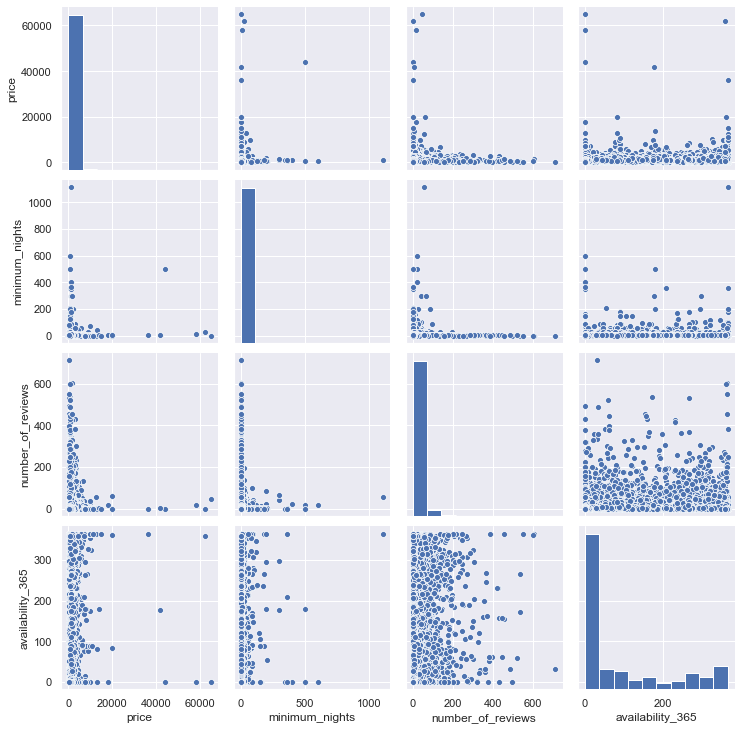

In [7]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.pairplot(dataset, vars=['price','minimum_nights', 'number_of_reviews', 'availability_365'])
plt.show()

In [8]:
# Categorize the number of listings based on the room type 
room_type_count = dataset.room_type.value_counts()
room_type_count

Entire home/apt    12230
Private room        1551
Shared room           19
Hotel room            15
Name: room_type, dtype: int64

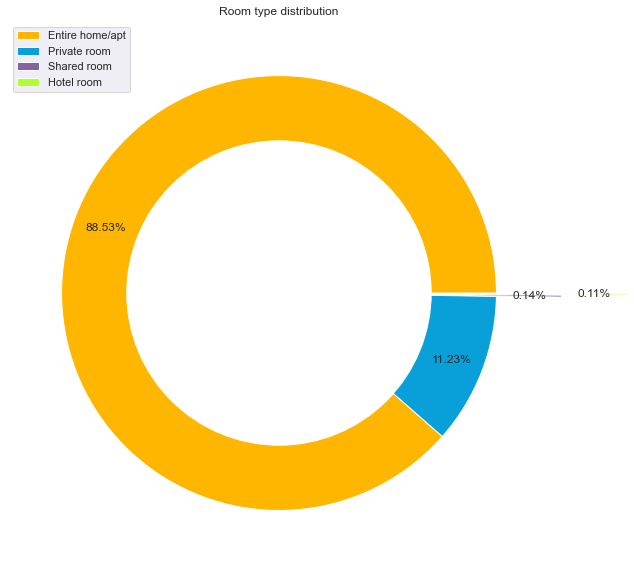

In [9]:
# Visualize the room type distribution 
explode = (0, 0, 0.3, 0.6)
colors = ['#FFB600', '#09A0DA','#8464a0', '#ADFF2F']

# Pie Chart
plt.pie(room_type_count, colors=colors,
        autopct='%.2f%%', pctdistance=0.85,
        explode=explode)
plt.legend(room_type_count.index, loc = "upper left")
plt.title("Room type distribution")

# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

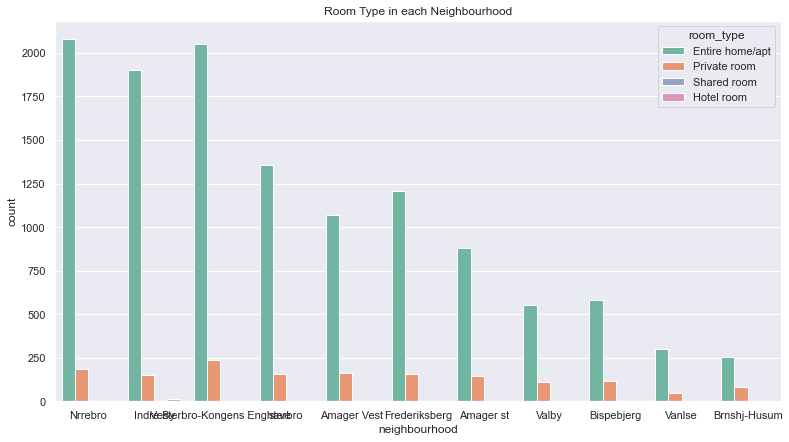

In [10]:
#Visualization of the room types in each neighbourhood
import seaborn as sns 
plt.figure(figsize=(13,7))
plt.title("Room Type in each Neighbourhood")
sns.countplot(dataset.neighbourhood,hue=dataset.room_type, palette="Set2")
plt.show()

***In each neighbourhood the most available type of room is entire home/apartment. In `Norrebro`, `Indre By` and `Vesterbro` have the most of them and they are around 2000 in each.***

In [11]:
# Analyzing the price in different neighbourhood for different room types
price_scale = dataset.groupby(['neighbourhood','room_type']).price.mean()
price_scale

neighbourhood              room_type      
Amager Vest                Entire home/apt    1408.319288
                           Private room       1002.624242
                           Shared room        1051.500000
Amager st                  Entire home/apt    1115.591116
                           Hotel room         1296.000000
                           Private room        612.090909
                           Shared room        1567.500000
Bispebjerg                 Entire home/apt     983.137457
                           Private room        485.217391
                           Shared room         198.000000
Brnshj-Husum               Entire home/apt    1105.551587
                           Private room        440.024096
                           Shared room         295.500000
Frederiksberg              Entire home/apt    1293.370554
                           Private room        672.702532
Indre By                   Entire home/apt    1674.605152
                           Ho

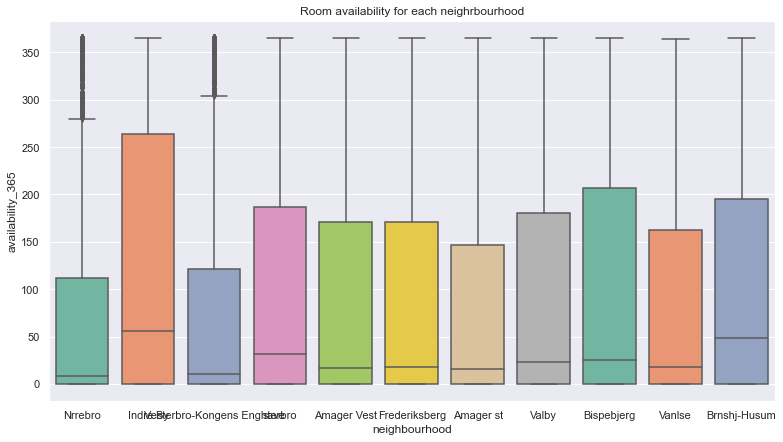

In [12]:
# Visualization of the room availability for each neighbourhood
plt.figure(figsize=(13,7))
plt.title("Room availability for each neighrbourhood")
sns.boxplot(data=dataset, x='neighbourhood',y='availability_365',palette="Set2")
plt.show()

**The `highest availability` of the rooms is observed in the `Intre By` neighbourhood (approximately 270 rooms available of any kind). The `lowest availability` is found in `Norrebro` (approximately 110 rooms available of any kind)The `highest availability` of the rooms is observed in the `Intre By` neighbourhood (approximately 270 rooms available of any kind). The `lowest availability` is found in `Norrebro` (approximately 110 rooms available of any kind).**

###  <span style='color:blue'> 2.3. Data Preprocessing </span> <br>

In [13]:
# Dispaly few variables
dataset.head(10).T

0  \
id                                              6983   
name                            Copenhagen 'N Livin'   
host_id                                        16774   
host_name                                      Simon   
neighbourhood_group                              NaN   
neighbourhood                                Nrrebro   
latitude                                     55.6864   
longitude                                    12.5474   
room_type                            Entire home/apt   
price                                            898   
minimum_nights                                     3   
number_of_reviews                                172   
last_review                               2022-06-21   
reviews_per_month                               1.08   
calculated_host_listings_count                     1   
availability_365                                   0   
number_of_reviews_ltm                              4   
license                                          NaN   

                                                                  1  \
id                                                            26057   
name                            Lovely house - most attractive area   
host_id                                                      109777   
host_name                                                      Kari   
neighbourhood_group                                             NaN   
neighbourhood                                              Indre By   
latitude                                                    55.6931   
longitude                                                   12.5765   
room_type                                           Entire home/apt   
price                                                          2600   
minimum_nights                                                    4   
number_of_reviews                                                59   
last_review                                              2022-08-09   
reviews_per_month                                              0.55   
calculated_host_listings_count                                    1   
availability_365                                                303   
number_of_reviews_ltm                                             8   
license                                                         NaN   

                                                                        2  \
id                                                                  26473   
name                            City Centre Townhouse Sleeps 1-10 persons   
host_id                                                            112210   
host_name                                                           Julia   
neighbourhood_group                                                   NaN   
neighbourhood                                                    Indre By   
latitude                                                           55.676   
longitude                                                         12.5754   
room_type                                                 Entire home/apt   
price                                                                3250   
minimum_nights                                                          3   
number_of_reviews                                                     300   
last_review                                                    2022-09-10   
reviews_per_month                                                    2.06   
calculated_host_listings_count                                          3   
availability_365                                                       56   
number_of_reviews_ltm                                                   7   
license                                                               NaN   

                                                              3  \
id                                                        29118   
name                            Best L

In [14]:
# Retrive useful information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13815 entries, 0 to 13814
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13815 non-null  int64  
 1   name                            13815 non-null  object 
 2   host_id                         13815 non-null  int64  
 3   host_name                       13814 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   13815 non-null  object 
 6   latitude                        13815 non-null  float64
 7   longitude                       13815 non-null  float64
 8   room_type                       13815 non-null  object 
 9   price                           13815 non-null  int64  
 10  minimum_nights                  13815 non-null  int64  
 11  number_of_reviews               13815 non-null  int64  
 12  last_review                     

In [15]:
# Observe wether null values are present
dataset.isnull().any()

id                                False
name                              False
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
dtype: bool

**We can observe that there are 5 columns containing null values. `host_name` column is missing one data point, `last_review` and `reviews_per_month`columns are missing 1645 data points. We can notice that column `neighbourhood_group` and `license` are containing no data points at all.**

**In order to remove the null values we are replacing them using mode and mean.**

In [16]:
# Replace missing values
dataset["host_name"].fillna(dataset["host_name"].mode()[0], inplace = True)
dataset["last_review"].fillna(dataset["last_review"].mode()[0], inplace = True)
dataset["reviews_per_month"].fillna(dataset["reviews_per_month"].mean(), inplace = True)

# Delete columns with no recordings and irrelevant data
del dataset["neighbourhood_group"]
del dataset["license"]
del dataset["name"]
del dataset["host_name"]

In [17]:
# Search for duplicate rows in the dataset 
duplicate_check = dataset["id"].duplicated()
duplicate_check

0        False
1        False
2        False
3        False
4        False
         ...  
13810    False
13811    False
13812    False
13813    False
13814    False
Name: id, Length: 13815, dtype: bool

In [18]:
duplicate_check = dataset["id"].duplicated().any()
duplicate_check

False

**All values in the printed boolean series are `False` which indicates that there are no duplicated  `id` values in our dataset. Each `id` value in the listing is unique.**

**Since we know that all the values in the `id` column are unique, we can set this column as an index for our dataset.**

In [19]:
dataset.set_index("id", inplace=True)
dataset.head().T

id                                        6983             26057  \
host_id                                   16774           109777   
neighbourhood                           Nrrebro         Indre By   
latitude                                55.6864          55.6931   
longitude                               12.5474          12.5765   
room_type                       Entire home/apt  Entire home/apt   
price                                       898             2600   
minimum_nights                                3                4   
number_of_reviews                           172               59   
last_review                          2022-06-21       2022-08-09   
reviews_per_month                          1.08             0.55   
calculated_host_listings_count                1                1   
availability_365                              0              303   
number_of_reviews_ltm                         4                8   

id                                        26473                      29118  \
host_id                                  112210                     125230   
neighbourhood                          Indre By  Vesterbro-Kongens Enghave   
latitude                                 55.676                    55.6702   
longitude                               12.5754                     12.555   
room_type                       Entire home/apt            Entire home/apt   
price                                      3250                        725   
minimum_nights                                3                          7   
number_of_reviews                           300                         24   
last_review                          2022-09-10                 2022-08-04   
reviews_per_month                          2.06                       0.16   
calculated_host_listings_count                3                          1   
availability_365                             56                         59   
number_of_reviews_ltm                         7                          2   

id                                                  31094  
host_id                                            129976  
neighbourhood                   Vesterbro-Kongens Enghave  
latitude                                          55.6666  
longitude                                         12.5553  
room_type                                 Entire home/apt  
price                                                1954  
minimum_nights                                          3  
number_of_reviews                                      19  
last_review                                    2022-08-22  
reviews_per_month                                    0.13  
calculated_host_listings_count                          1  
availability_365                                        0  
number_of_reviews_ltm                                   2

In [20]:
# Renaming column of dataset for better interpretation

dataset.rename(columns={'calculated_host_listings_count':'total_listings', 'availability_365':'availability_current_year', 'number_of_reviews_ltm':'reviews_current_year'}, inplace=True)
dataset.head().T

id                                   6983             26057            26473  \
host_id                              16774           109777           112210   
neighbourhood                      Nrrebro         Indre By         Indre By   
latitude                           55.6864          55.6931           55.676   
longitude                          12.5474          12.5765          12.5754   
room_type                  Entire home/apt  Entire home/apt  Entire home/apt   
price                                  898             2600             3250   
minimum_nights                           3                4                3   
number_of_reviews                      172               59              300   
last_review                     2022-06-21       2022-08-09       2022-09-10   
reviews_per_month                     1.08             0.55             2.06   
total_listings                           1                1                3   
availability_current_year                0              303               56   
reviews_current_year                     4                8                7   

id                                             29118  \
host_id                                       125230   
neighbourhood              Vesterbro-Kongens Enghave   
latitude                                     55.6702   
longitude                                     12.555   
room_type                            Entire home/apt   
price                                            725   
minimum_nights                                     7   
number_of_reviews                                 24   
last_review                               2022-08-04   
reviews_per_month                               0.16   
total_listings                                     1   
availability_current_year                         59   
reviews_current_year                               2   

id                                             31094  
host_id                                       129976  
neighbourhood              Vesterbro-Kongens Enghave  
latitude                                     55.6666  
longitude                                    12.5553  
room_type                            Entire home/apt  
price                                           1954  
minimum_nights                                     3  
number_of_reviews                                 19  
last_review                               2022-08-22  
reviews_per_month                               0.13  
total_listings                                     1  
availability_current_year                          0  
reviews_current_year                               2

In [21]:
# Convert date object type to datetime
dataset['last_review'] = pd.to_datetime(dataset['last_review'], format='%Y-%m-%d')

**The row `last_review` represents the date when the AirBnb owner got his last review. For the values to be usable in the model, it would be more useful to convert them to `days_since_last_review`.**

In [22]:
max_date = dataset["last_review"].max()
dataset["last_review"] = (max_date - dataset["last_review"]).dt.days
new_col = {'last_review':'days_since_last_review'}

dataset.rename(columns=new_col, inplace=True)

In [23]:
dataset.head().T

id                                   6983             26057            26473  \
host_id                              16774           109777           112210   
neighbourhood                      Nrrebro         Indre By         Indre By   
latitude                           55.6864          55.6931           55.676   
longitude                          12.5474          12.5765          12.5754   
room_type                  Entire home/apt  Entire home/apt  Entire home/apt   
price                                  898             2600             3250   
minimum_nights                           3                4                3   
number_of_reviews                      172               59              300   
days_since_last_review                  95               46               14   
reviews_per_month                     1.08             0.55             2.06   
total_listings                           1                1                3   
availability_current_year                0              303               56   
reviews_current_year                     4                8                7   

id                                             29118  \
host_id                                       125230   
neighbourhood              Vesterbro-Kongens Enghave   
latitude                                     55.6702   
longitude                                     12.555   
room_type                            Entire home/apt   
price                                            725   
minimum_nights                                     7   
number_of_reviews                                 24   
days_since_last_review                            51   
reviews_per_month                               0.16   
total_listings                                     1   
availability_current_year                         59   
reviews_current_year                               2   

id                                             31094  
host_id                                       129976  
neighbourhood              Vesterbro-Kongens Enghave  
latitude                                     55.6666  
longitude                                    12.5553  
room_type                            Entire home/apt  
price                                           1954  
minimum_nights                                     3  
number_of_reviews                                 19  
days_since_last_review                            33  
reviews_per_month                               0.13  
total_listings                                     1  
availability_current_year                          0  
reviews_current_year                               2

In [24]:
# Sort the dataset based on the price  
dataset = dataset.sort_values(by='price', ascending=True)

In [25]:
# Exclude the listing with 0 for price
dataset = dataset[dataset.price > 0]
dataset.head().T

id                             39000504         41285362      48652028  \
host_id                        25580883        116485169     225782385   
neighbourhood                   Nrrebro       Bispebjerg    Bispebjerg   
latitude                        55.6894          55.6999       55.7032   
longitude                       12.5626           12.536       12.5342   
room_type                  Private room  Entire home/apt  Private room   
price                                79              113           120   
minimum_nights                        1                1             1   
number_of_reviews                    28                0             0   
days_since_last_review                9                6             6   
reviews_per_month                  0.77         0.903816      0.903816   
total_listings                        2                1             1   
availability_current_year            38                0             0   
reviews_current_year                 22                0             0   

id                             47282476      51107459  
host_id                       247828624     412918036  
neighbourhood              Brnshj-Husum         Valby  
latitude                        55.7184       55.6544  
longitude                       12.4848       12.5064  
room_type                  Private room  Private room  
price                               124           127  
minimum_nights                       90             7  
number_of_reviews                     0             2  
days_since_last_review                6           390  
reviews_per_month              0.903816          0.15  
total_listings                        1             1  
availability_current_year             0             0  
reviews_current_year                  0             0

In [26]:
# Acces any record from the dataset
dataset.iloc[13812]

host_id                          59346390
neighbourhood                 Amager Vest
latitude                          55.6622
longitude                         12.5794
room_type                    Private room
price                               64900
minimum_nights                          1
number_of_reviews                      47
days_since_last_review                320
reviews_per_month                     0.6
total_listings                          1
availability_current_year               0
reviews_current_year                    4
Name: 11339117, dtype: object

**An interesting observation once accesing the recording for the most expensive listing is that it has a considerable number of reviews. This observation can lead to meaningful decisions in our further analysis.**

**Defining outliers is an essential part of the data preparation process. The outliers are the extreme values within the dataset. One way to spot the outliers is using the function `.describe()` which generates a statistical summary. Outliers in the column of price will influence the analysis so this is where we will focus on.**

In [27]:
#Statistical summary of the column price
dataset['price'].describe()

count    13813.000000
mean      1206.053573
std       1433.173437
min         79.000000
25%        729.000000
50%        995.000000
75%       1369.000000
max      64900.000000
Name: price, dtype: float64

**We can notice that the max value is 64900 which is a large number compare to the mean which is only 1205, this indicates that the max value is an outlier. So we decided to use a data visualization technique to spot the outliers in detail. 
Box plots are useful because they show minimum and maximum values, the median, and the interquartile range of the data.**

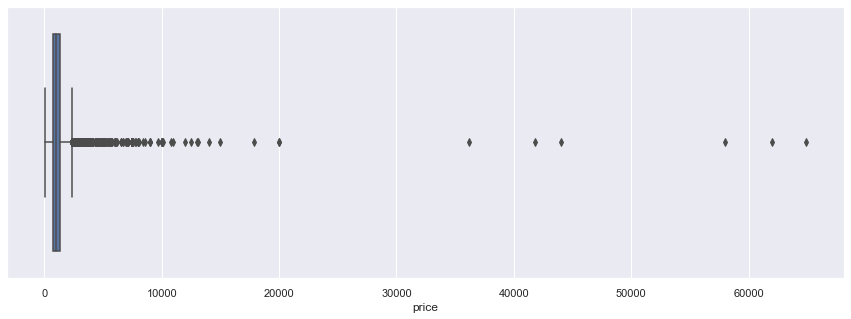

In [28]:
# Create a boxplot to idetify outliers for price
sns.set(rc={"figure.figsize":(15, 5)})
sns.boxplot(x = dataset["price"])
plt.show()

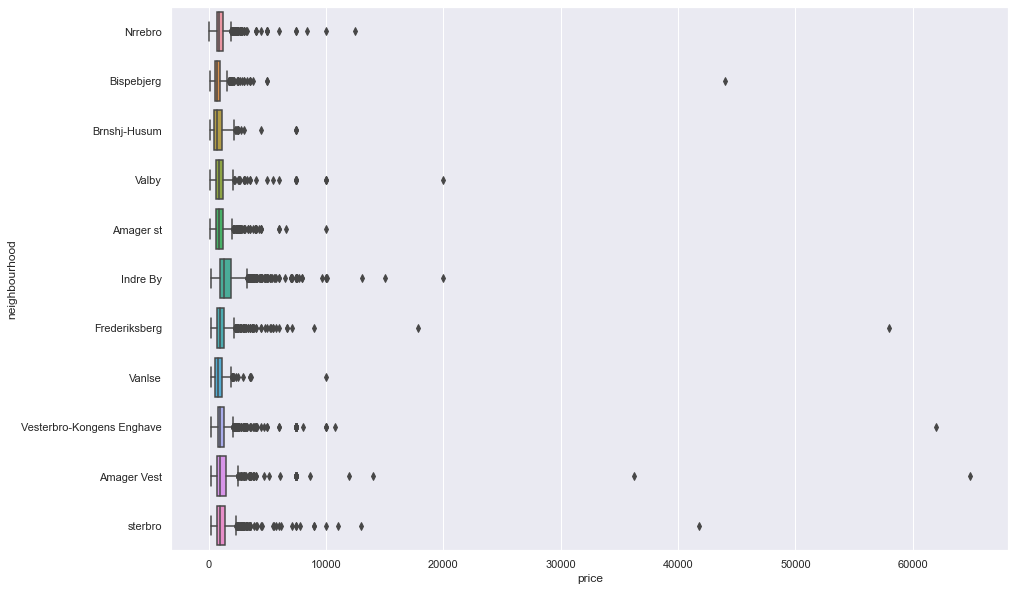

In [29]:
# Create multiple boxplots depending on neighbourhood areas
sns.set(rc={"figure.figsize":(15, 10)})
sns.boxplot(data=dataset, x="price", y="neighbourhood")
plt.show()

**There are 6 outlier easy to spot above the price of 20000. We already had an observation regarding the most expensive listing in our dataset, let's check the rest.**

In [30]:
outlier_2 = dataset.iloc[13811]
outlier_2

host_id                                       44675877
neighbourhood                Vesterbro-Kongens Enghave
latitude                                       55.6578
longitude                                      12.5619
room_type                              Entire home/apt
price                                            62000
minimum_nights                                      27
number_of_reviews                                    0
days_since_last_review                               6
reviews_per_month                             0.903816
total_listings                                       1
availability_current_year                          358
reviews_current_year                                 0
Name: 33108071, dtype: object

In [31]:
outlier_3 = dataset.iloc[13810]
outlier_3

host_id                             33025844
neighbourhood                  Frederiksberg
latitude                             55.6892
longitude                            12.5181
room_type                    Entire home/apt
price                                  58000
minimum_nights                            14
number_of_reviews                         16
days_since_last_review                   923
reviews_per_month                       0.23
total_listings                             1
availability_current_year                  0
reviews_current_year                       0
Name: 16397010, dtype: object

In [32]:
outlier_4 = dataset.iloc[13809]
outlier_4

host_id                             83120126
neighbourhood                     Bispebjerg
latitude                             55.7071
longitude                            12.5255
room_type                    Entire home/apt
price                                  44000
minimum_nights                           500
number_of_reviews                          1
days_since_last_review                   771
reviews_per_month                       0.04
total_listings                             1
availability_current_year                  0
reviews_current_year                       0
Name: 44224836, dtype: object

In [33]:
outlier_5 = dataset.iloc[13808]
outlier_5

host_id                             70535897
neighbourhood                        sterbro
latitude                             55.7023
longitude                            12.5743
room_type                    Entire home/apt
price                                  41800
minimum_nights                             3
number_of_reviews                          5
days_since_last_review                   404
reviews_per_month                       0.19
total_listings                             2
availability_current_year                177
reviews_current_year                       0
Name: 44226456, dtype: object

In [34]:
outlier_6 = dataset.iloc[13807]
outlier_6

host_id                            329937265
neighbourhood                    Amager Vest
latitude                             55.6587
longitude                            12.5686
room_type                    Entire home/apt
price                                  36200
minimum_nights                             5
number_of_reviews                          0
days_since_last_review                     6
reviews_per_month                   0.903816
total_listings                             1
availability_current_year                365
reviews_current_year                       0
Name: 41764565, dtype: object

**The are all of type `Entire home/apt`. `outlier_2`, based on the listing name is not available anymore. `outlier_3` and `outlier_5` have more than one review and a resonable `minimum_nights` stay. Others either have 0 reviews or a very high `minimum_nights` number. It can be concluded that some of the recordings from outliers can corrupt our dataset, but they can't be absolutely neglected. Therefore, we will proceed with two datasets, one with and without the outliers.**

In [35]:
# Count the outliers that are above the 75% 
print("Number of outliers found above the 75%:")
len(dataset[dataset.price>1368.5])

Number of outliers found above the 75%:


3454

In [36]:
# Count the outliers that are below the 25% (we used the values shown from the statistical summary)
print("Number of outliers found below the 25%:")
len(dataset[dataset.price<729])

Number of outliers found below the 25%:


3447

In [37]:
# Calculate IQR point
Q1 = dataset["price"].quantile(0.25)
Q3 = dataset["price"].quantile(0.75)
IQR = Q3 - Q1
IQR

640.0

In [38]:
# Determine the baundaries
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [39]:
lower_lim

-231.0

In [40]:
upper_lim

2329.0

In [41]:
outlier_up = (dataset["price"] > upper_lim)

In [42]:
outlier_low = (dataset["price"] < lower_lim)

In [43]:
len(dataset["price"]) - (len(dataset["price"][outlier_low]) + len(dataset["price"][outlier_up]))

13037

In [44]:
dataset.shape

(13813, 13)

**As the numbers are indicating, we will lose 776 records if we drop the outliers.**

In [45]:
dataset["price"][outlier_low | outlier_up]

id
24957364               2341
11264667               2345
628252698168179533     2350
21187833               2350
604864099879521046     2350
                      ...  
44226456              41800
44224836              44000
16397010              58000
33108071              62000
11339117              64900
Name: price, Length: 776, dtype: int64

In [46]:
# Drop outliers
dataset2 = dataset[~(outlier_low | outlier_up)]

In [47]:
dataset2.shape

(13037, 13)

**Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in our dataset. That's why it is a good idea to review them.**

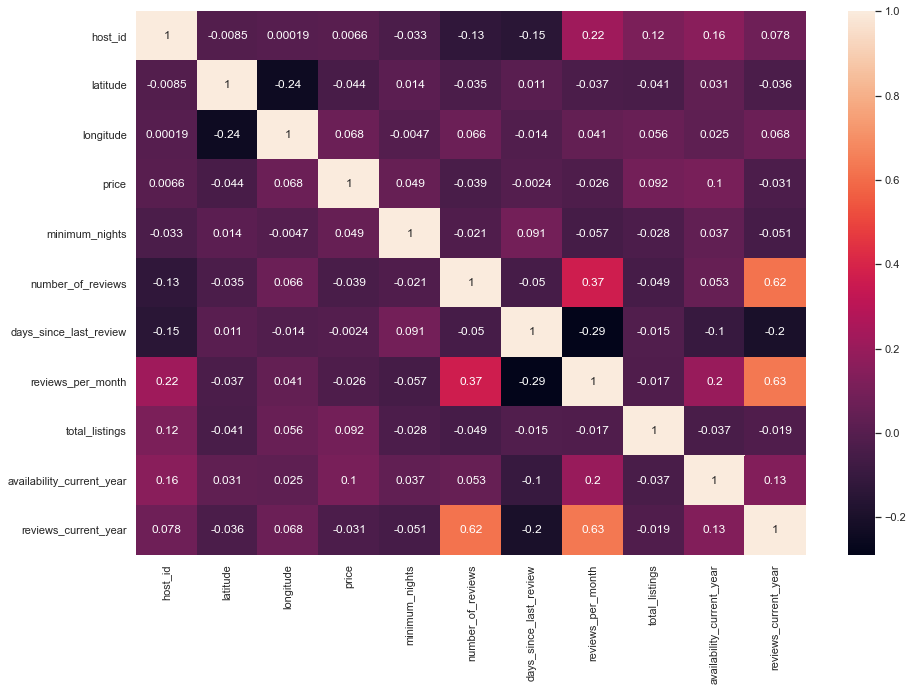

In [48]:
# Create correlation heat map for data with outliers
sns.set(rc={"figure.figsize":(15, 10)})
sns.heatmap(dataset.corr(), annot=True)
plt.show()

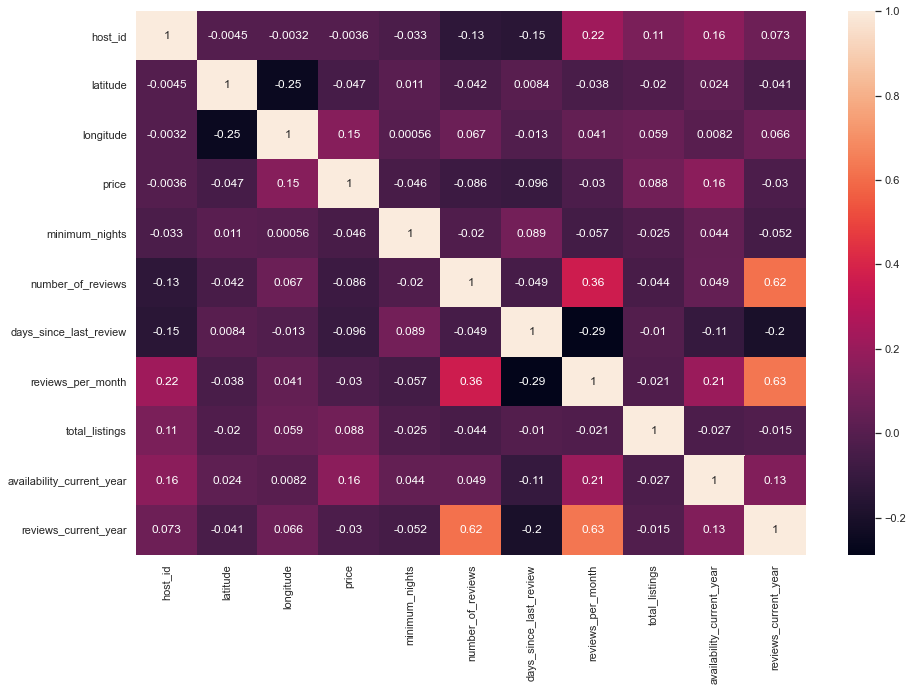

In [49]:
# Create correlation heat map for data without outliers
sns.set(rc={"figure.figsize":(15, 10)})
sns.heatmap(dataset2.corr(), annot=True)
plt.show()

**Both heatmaps show that there are no strong correlations between the attributes of our datasets.**

**Now we should define value in order to determine wether the price is "low" or "high".**

In [50]:
price_threshold=np.percentile(dataset['price'], 75)
print(price_threshold)

1369.0


**How many listings are above 75th percentile?**

In [51]:
len(dataset[dataset.price>price_threshold])

3453

**How many listings are below 75th percentile?**

In [52]:
len(dataset[dataset.price<price_threshold])

10359

# <span style='color:green'> 3. Prediction Challange </span> <br>

###  <span style='color:blue'> 3.1. Binary Classification </span> <br>

Text(0, 0.5, 'Frequency')

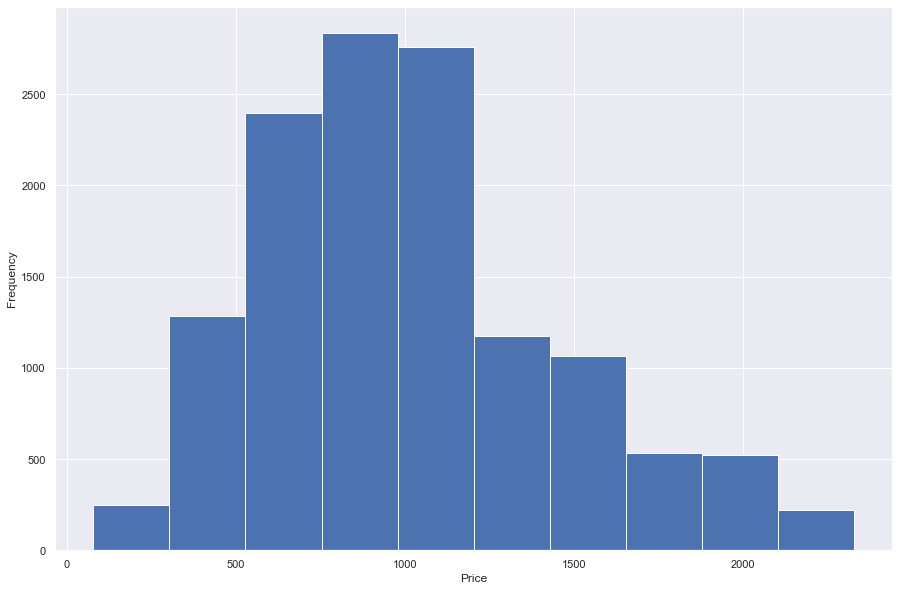

In [53]:
# Visualization of the new dataset after the outliers were removed
dataset2['price'].hist()
plt.xlabel("Price")
plt.ylabel("Frequency")

**This prediction model will be based on our new dataset after the outliers were removed. Further in the analysis, we will create a prediction model using the original dataset consisting the outliers, so we can compare and evalute the results.**

In [54]:
# Prepare the target variable 
dataset2['p_price']=(dataset2['price'].apply(lambda x: x<=price_threshold)).astype(float)

# Make target variable
target=dataset2['p_price']

<ipython-input-54-7a971861b1b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['p_price']=(dataset2['price'].apply(lambda x: x<=price_threshold)).astype(float)


In [55]:
# Turn categorical and numerical columns into dummy variables in order to evaluate them further on 
features_col = ['neighbourhood', 'room_type','number_of_reviews','reviews_per_month']
features = pd.get_dummies(dataset2[features_col], columns=['neighbourhood','room_type','reviews_per_month'], drop_first=True)

In [56]:
# Making the training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (features, target, train_size=0.7)

In [57]:
# Building a Logistic Regression Model 
x_train_std = x_train.copy()
x_test_std = x_test.copy()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=14000)
lr.fit(x_train_std,y_train)

#Evaluate the performance of the classifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# make predictions from Logistic regression model
y_pred_lr = lr.predict(x_test_std)

# evaluate quality of predictions
print("Accuracy is %f" % accuracy_score(y_test,y_pred_lr))
print("F1-score is %f" % f1_score(y_test,y_pred_lr))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Accuracy is 0.797546
F1-score is 0.885450
Confusion matrix:
[[  59  733]
 [  59 3061]]


**The accuracy is defined as the ratio of true positives and true negatives to all positive and negative observations. 
`In this model the accuracy is equal to 76% which represents the portion of the right predictions over the total predictions.` 
The accuracy rate is considered good, but it doesn’t show any possible errors our machine learning model makes on new data we haven’t seen before.**`

**The F1-score represents the model score as a function of precision and recall score. It is often used as a single value that provides high-level information about a model’s output quality. `In this model the F1-score is equal to 0.85 which is close to 1 (f1-score is considered perfect when it's 1).` Our F1-score it is considered as a good score which means that in this model there are low false positives and low false negatives predictions.**

**The confusion matrix is a summarized table assesing the performance of our classification model.
From row 2 of the table we can see that **3018 out of 3072 (54  + 3018) observations in class 1 are predicted correctly, which is a really good portion which it could also be seen in the good f1 score.**

In [58]:
# Checking the balance of our dataset 
# Fraction of observations with class 1
print("Class 1:")
print(len(dataset2[(dataset2['p_price']==1)])/len(dataset2))


# Fraction of observations with class 0
print("Class 0:")
print(len(dataset2[(dataset2['p_price']==0)])/len(dataset2))

Class 1:
0.79466134846974
Class 0:
0.20533865153026004


**The classes of the dataset are imbalanced, with around 80% of the rooms having a price lower or equal than the set "high price" and 20% of them being higher than that. Despite the fact that the accuracy and the F1-score were equally good, the F1 score is a better measure of the model performance when the dataset is imbalanced, since accuracy does not distinguish between the numbers of correctly classified examples of different classes.**

###  <span style='color:blue'> 3.2. Multi Class Classification </span> <br>

In [59]:
# Building a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dataset2_dtc = DecisionTreeClassifier()

dataset2_dtc.fit(x_train_std, y_train)

# Make predictions from decision tree model
y_pred_dt = dataset2_dtc.predict(x_test_std)

# Evaluate quality of predictions
print("Accuracy is %f" % accuracy_score(y_test,y_pred_dt))
print("F1-score is %f" % f1_score(y_test,y_pred_dt))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_dt))

Accuracy is 0.725204
F1-score is 0.832372
Confusion matrix:
[[ 168  624]
 [ 451 2669]]


**Overall, the Logistic Regression performs slightly better with an F1 score of 0.85 compared to 0.83 for the Decision Tree. It is better at predicting the price range 3018/3072 compared to the 2638/3072 correctly predicted from the Decision tree. Τhe accuracy is lower than in the Logistic Regression equal to 72%, but as we already mentioned, we are dealing with an unbalanced dataset so we will not use accuracy as a quality estimator of the prediction model.**

In [60]:
# Calculating precision and recall for the Logistic Regression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
print("Precision is %f" %precision)
print("Recall is %f" %recall)

Precision is 0.806800
Recall is 0.981090


In [61]:
# Calculating precision and recall fro the Decission Tree 
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
print("Precision is %f" %precision)
print("Recall is %f" %recall)

Precision is 0.810507
Recall is 0.855449


**Other metrics used for the evaluation of the performance of the prediction model is precision and recall. Precision represents how good the model is at predicting a specific category and recall how many times the model was able to detect a specific category.** 

**Comparing the results, the Logistic Regression is still performing better than the Decission Tree, there is almost no difference in the values of **precision (0.80 vs 0.81). The recall value for each model is 0.98 and 0.85 respectively. The outcome confirms the previous results about the accuracy and the F1-score we got for each classifier.**

**We will repeat the same process using our original dataset containing the outliers and compare the performance of each model.**

Text(0, 0.5, 'Frequency')

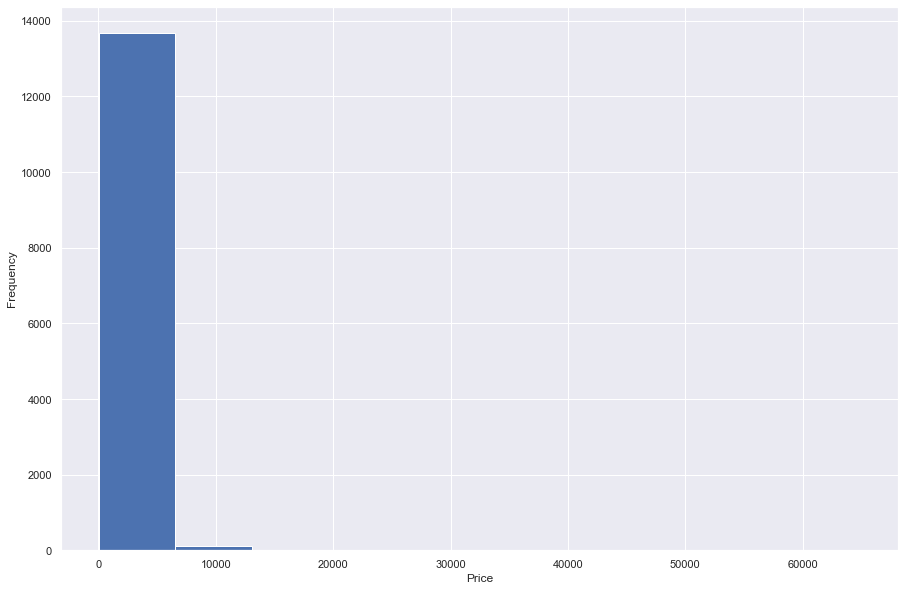

In [62]:
# Visualization of the new dataset after the outliers were removed
dataset['price'].hist()
plt.xlabel("Price")
plt.ylabel("Frequency")

In [63]:
print("Original dataset:", dataset.shape)

Original dataset: (13813, 13)


In [64]:
# Prepare the target variable 
dataset['p_price']=(dataset['price'].apply(lambda x: x<=1369)).astype(float)

# Make target variable
target=dataset['p_price']

In [65]:
# Turn categorical and numerical columns into dummy variables in order to evaluate them further on 
features_col = ['neighbourhood', 'room_type','number_of_reviews','reviews_per_month']
features = pd.get_dummies(dataset[features_col], columns=['neighbourhood','room_type','reviews_per_month'], drop_first=True)

In [66]:
# Making the training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (features, target, train_size=0.7)

In [67]:
# Building a Logistic Regression Model 
x_train_std = x_train.copy()
x_test_std = x_test.copy()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=14000)
lr.fit(x_train_std,y_train)

#Evaluate the performance of the classifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# make predictions from Logistic regression model
y_pred_lr = lr.predict(x_test_std)

# evaluate quality of predictions
print("Accuracy is %f" % accuracy_score(y_test,y_pred_lr))
print("F1-score is %f" % f1_score(y_test,y_pred_lr))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Accuracy is 0.750000
F1-score is 0.849593
Confusion matrix:
[[ 182  865]
 [ 171 2926]]


In [68]:
# Checking the balance of our dataset 
# Fraction of observations with class 1
print("Class 1:")
print(len(dataset[(dataset['p_price']==1)])/len(dataset))


# Fraction of observations with class 0
print("Class 0:")
print(len(dataset[(dataset['p_price']==0)])/len(dataset))

Class 1:
0.7500180988923478
Class 0:
0.2499819011076522


In [69]:
# Building a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dataset2_dtc = DecisionTreeClassifier()

dataset2_dtc.fit(x_train_std, y_train)

# Make predictions from decision tree model
y_pred_dt = dataset2_dtc.predict(x_test_std)

# Evaluate quality of predictions
print("Accuracy is %f" % accuracy_score(y_test,y_pred_dt))
print("F1-score is %f" % f1_score(y_test,y_pred_dt))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_dt))

Accuracy is 0.680743
F1-score is 0.791292
Confusion matrix:
[[ 313  734]
 [ 589 2508]]


In [70]:
# Calculating precision and recall for the Logistic Regression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
print("Precision is %f" %precision)
print("Recall is %f" %recall)

Precision is 0.771828
Recall is 0.944785


In [71]:
# Calculating precision and recall fro the Decission Tree 
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
print("Precision is %f" %precision)
print("Recall is %f" %recall)

Precision is 0.773597
Recall is 0.809816


**Overall, even while using a database containing the outliers, the prediction models, both of them perfom really well. 
However, an improvement was observed in all of the metrics of the models.**

**In the Logistic Regression model the accuracy stayed the same at 76%, the f1-score also stayed the same at 85%, the precision and recall improved from 0.78% to 80% and from 0.95 to 0.98 respectively.**

**In the Decision Tree model the accuracy improved from 68% to 72%, the f1-score improved from 0.79 to 0.83, the precision and recall improved from 0.78 to 0.81 and from 0.81 to 0.85 respectively.**

**Outliers are influential only if they have a large impact on the regression equation. Specifically, Logistic Regression models are not much impacted due to the presence of outliers because the logistic sigmoid function tapers the outliers. Decision trees are also not sensitive to outliers or noisy data since the partitioning happens based on the proportion of samples within the split ranges and not on absolute values. The above explains the reasons why there is not a large significant improvement of the metrics from the dataset containing the outliers.**

#  <span style='color:green'> 4. Exploratory Component </span> <br>

**In the exploratory component, an additional data was added to the analysis. The dataset contains all of the metro, and S-tog stations in Copenhagen, along with their coordinates.**

**The following research questions will be addressed.**
- **Does the presence of a metro/S-tog station have any effect on the price?**
- **Can the prediction model be improved by adding the data to the original dataset?**

**The main idea to address these questions are:**
- **Visulazing by plotting the data along with the metro/S-tog stations.**
- **Adding te minimum distance to the closest station to the dataset.**
- **Running the model again and observing any changes.**

In [283]:
#Difining maximum and minimum coordinates in the dataset
max_lon=dataset.longitude.max()
min_lon=dataset.longitude.min()
max_lat=dataset.latitude.max()
min_lat = dataset.latitude.min()

**Now it is time to get the data with the metro/S-tog coordinates and prepare the datasets.**

**Metro and S-tog data for the lines was downloaded externallly as SHP file from Open Street Map.**

In [284]:
metro = pd.read_csv("metro.csv")
metro = metro.drop(metro[(metro.Lat < min_lat)].index)
metro = metro.drop(metro[(metro.Lat > max_lat)].index)
metro = metro.drop(metro[(metro.Lon < min_lon)].index)
metro = metro.drop(metro[(metro.Lon > max_lon)].index)
metro = metro.reset_index()
metro.drop(['index'],axis=1)

Station        Lat        Lon
0       Aksel Møllers Have St. (Metro)  55.686378  12.533187
1            Amager Strand St. (Metro)  55.656518  12.631584
2                Amagerbro St. (Metro)  55.663326  12.602929
3             Bella Center St. (Metro)  55.638051  12.582928
4           Christianshavn St. (Metro)  55.672054  12.591385
5                  DR Byen St. (Metro)  55.655813  12.588990
6            Enghave Plads St. (Metro)  55.667284  12.545814
7                 Fasanvej St. (Metro)  55.681669  12.523102
8                  Femøren St. (Metro)  55.645348  12.638324
9                Flintholm St. (Metro)  55.685869  12.499527
10                   Forum St. (Metro)  55.681821  12.552430
11      Frederiksberg Allé St. (Metro)  55.673727  12.540351
12           Frederiksberg St. (Metro)  55.681223  12.531719
13           Gammel Strand St. (Metro)  55.677749  12.579575
14          Islands Brygge St. (Metro)  55.663422  12.585217
15                 Kastrup St. (Metro)  55.635747  12.646732
16                 København H (Metro)  55.671941  12.564120
17          Kongens Nytorv St. (Metro)  55.679185  12.585228
18          Lergravsparken St. (Metro)  55.662101  12.616417
19               Lindevang St. (Metro)  55.683482  12.512873
20              Lufthavnen St. (Metro)  55.630137  12.649390
21            Marmorkirken St. (Metro)  55.685245  12.588632
22                Nordhavn St. (Metro)  55.707298  12.591834
23                Nørrebro St. (Metro)  55.700552  12.538082
24       Nørrebros Runddel St. (Metro)  55.693945  12.548899
25               Nørreport St. (Metro)  55.683843  12.571044
26             Nuuks Plads St. (Metro)  55.688795  12.542892
27                 Ørestad St. (Metro)  55.629055  12.579389
28                 Øresund St. (Metro)  55.661701  12.628453
29               Orientkaj St. (Metro)  55.711612  12.595272
30               Østerport St. (Metro)  55.693217  12.585352
31  Poul Henningsens Plads St. (Metro)  55.709250  12.576709
32           Rådhuspladsen St. (Metro)  55.676373  12.568803
33           Skjolds Plads St. (Metro)  55.703280  12.548233
34                  Sundby St. (Metro)  55.645199  12.585728
35               Trianglen St. (Metro)  55.699135  12.576070
36                 Vanløse St. (Metro)  55.687297  12.491664
37              Vestamager St. (Metro)  55.619391  12.575297
38       Vibenshus Runddel St. (Metro)  55.706284  12.564000

In [285]:
Stog = pd.read_csv("Stog2.csv")
Stog = Stog.drop(Stog[(Stog.Lat < min_lat)].index)
Stog = Stog.drop(Stog[(Stog.Lat > max_lat)].index)
Stog = Stog.drop(Stog[(Stog.Lon < min_lon)].index)
Stog = Stog.drop(Stog[(Stog.Lon > max_lon)].index)
Stog = Stog.reset_index()
Stog.drop(['index'],axis=1)

Station        Lat        Lon
0           Avedøre St.  55.625183  12.454256
1        Bispebjerg St.  55.706348  12.541632
2      Brøndbyøster St.  55.665068  12.440211
3         Carlsberg St.  55.663257  12.537353
4           Danshøj St.  55.664274  12.493732
5        Dybbølsbro St.  55.664828  12.559511
6         Dyssegård St.  55.732629  12.535743
7            Emdrup St.  55.720887  12.540687
8          Friheden St.  55.628887  12.482553
9       Fuglebakken St.  55.695429  12.527382
10          Grøndal St.  55.690738  12.516007
11         Hellerup St.  55.731022  12.567658
12           Herlev St.  55.718919  12.443674
13            Husum St.  55.709409  12.464033
14         Hvidovre St.  55.664510  12.474346
15            Islev St.  55.699529  12.469383
16      Jyllingevej St.  55.690810  12.477206
17        KB Hallen St.  55.677963  12.492328
18          København H  55.673059  12.565558
19         Langgade St.  55.667050  12.504224
20  Peter Bangs Vej St.  55.678590  12.503443
21         Ryparken St.  55.715362  12.559492
22          Rødovre St.  55.664820  12.458641
23           Sjælør St.  55.651742  12.527265
24      Svanemøllen St.  55.715550  12.578049
25          Sydhavn St.  55.654756  12.537174
26            Valby St.  55.663997  12.514450
27          Vangede St.  55.739658  12.523342
28       Vesterport St.  55.676011  12.562087
29   Vigerslev Allé St.  55.660030  12.499095
30           Ålholm St.  55.672330  12.493114
31          Åmarken St.  55.640079  12.499699

In [286]:
import geopandas as gpd # Import geopandas library
railways = gpd.read_file('denmark-latest-free.shp/gis_osm_railways_free_1.shp')
roads = gpd.read_file('denmark-latest-free.shp/gis_osm_roads_free_1.shp')

**Visulization is an important factor for data analysis. Next we will plot the listings along with all the stations. Here, the mean is used, where the red dots are listings with the price above the mean, and the green dots are the listings below the means. This allows us to see if there are any obvious signs indicating that listings located closer to a station is priced higher.**

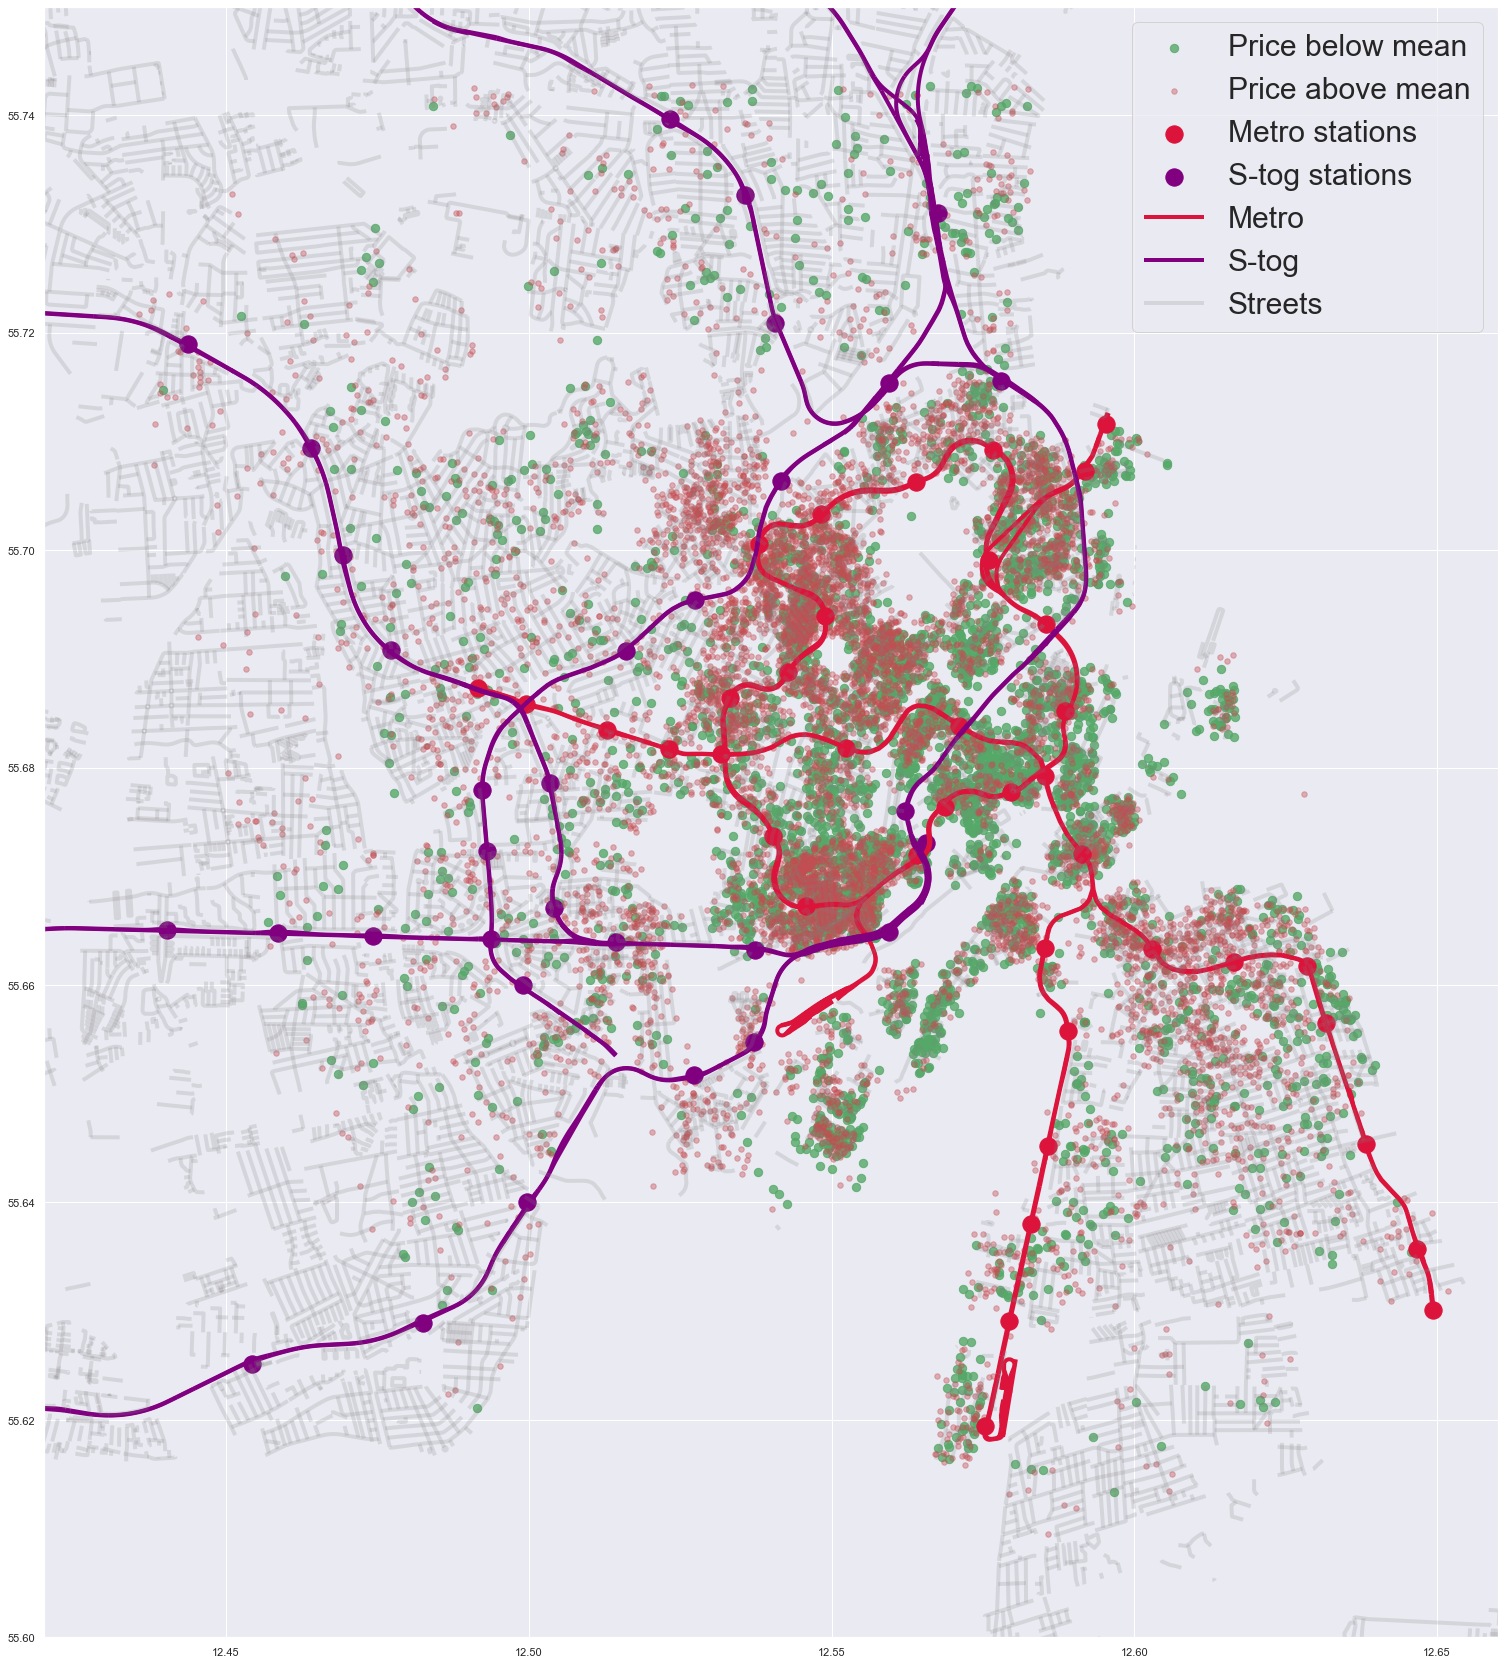

In [287]:
fig, ax = plt.subplots(figsize=(30,30))

ax.set_aspect('equal')
ax.scatter(dataset.longitude[dataset.price > dataset.price.mean()], dataset.latitude[dataset.price > dataset.price.mean()],s=70, c='g', alpha=0.8,label='Price below mean')
ax.scatter(dataset.longitude[dataset.price < dataset.price.mean()], dataset.latitude[dataset.price < dataset.price.mean()],s=30, c='r',alpha=0.4, label='Price above mean')

ax.scatter(metro.Lon,metro.Lat,color = "crimson",s=300,label="Metro stations")
ax.scatter(Stog.Lon,Stog.Lat,color = "purple",s=300,label="S-tog stations")

railways[railways.fclass=='subway'].plot(ax=ax, color='crimson', linewidth=4, label='Metro', alpha=1)
railways[railways.fclass=='light_rail'].plot(ax=ax, color='purple', linewidth=4, label='S-tog', alpha=1)
roads[roads.fclass=='residential'].plot(ax=ax, color='gray', linewidth=4, label='Streets', alpha=0.2)

ax.set_xlim(12.42,12.66)
ax.set_ylim(55.6,55.75)

plt.legend(prop={'size': 30})

**It is rather unclear if the price is affected if a station is nearby. Lets try to narrow down what we define as high and low price.**
**What if we only plot the listings with price below 25th quantile and above the 75th quantile?**

In [330]:
#Define the percentile 
LOW = dataset.price.quantile(0.25)
HIGH = dataset.price.quantile(0.75)

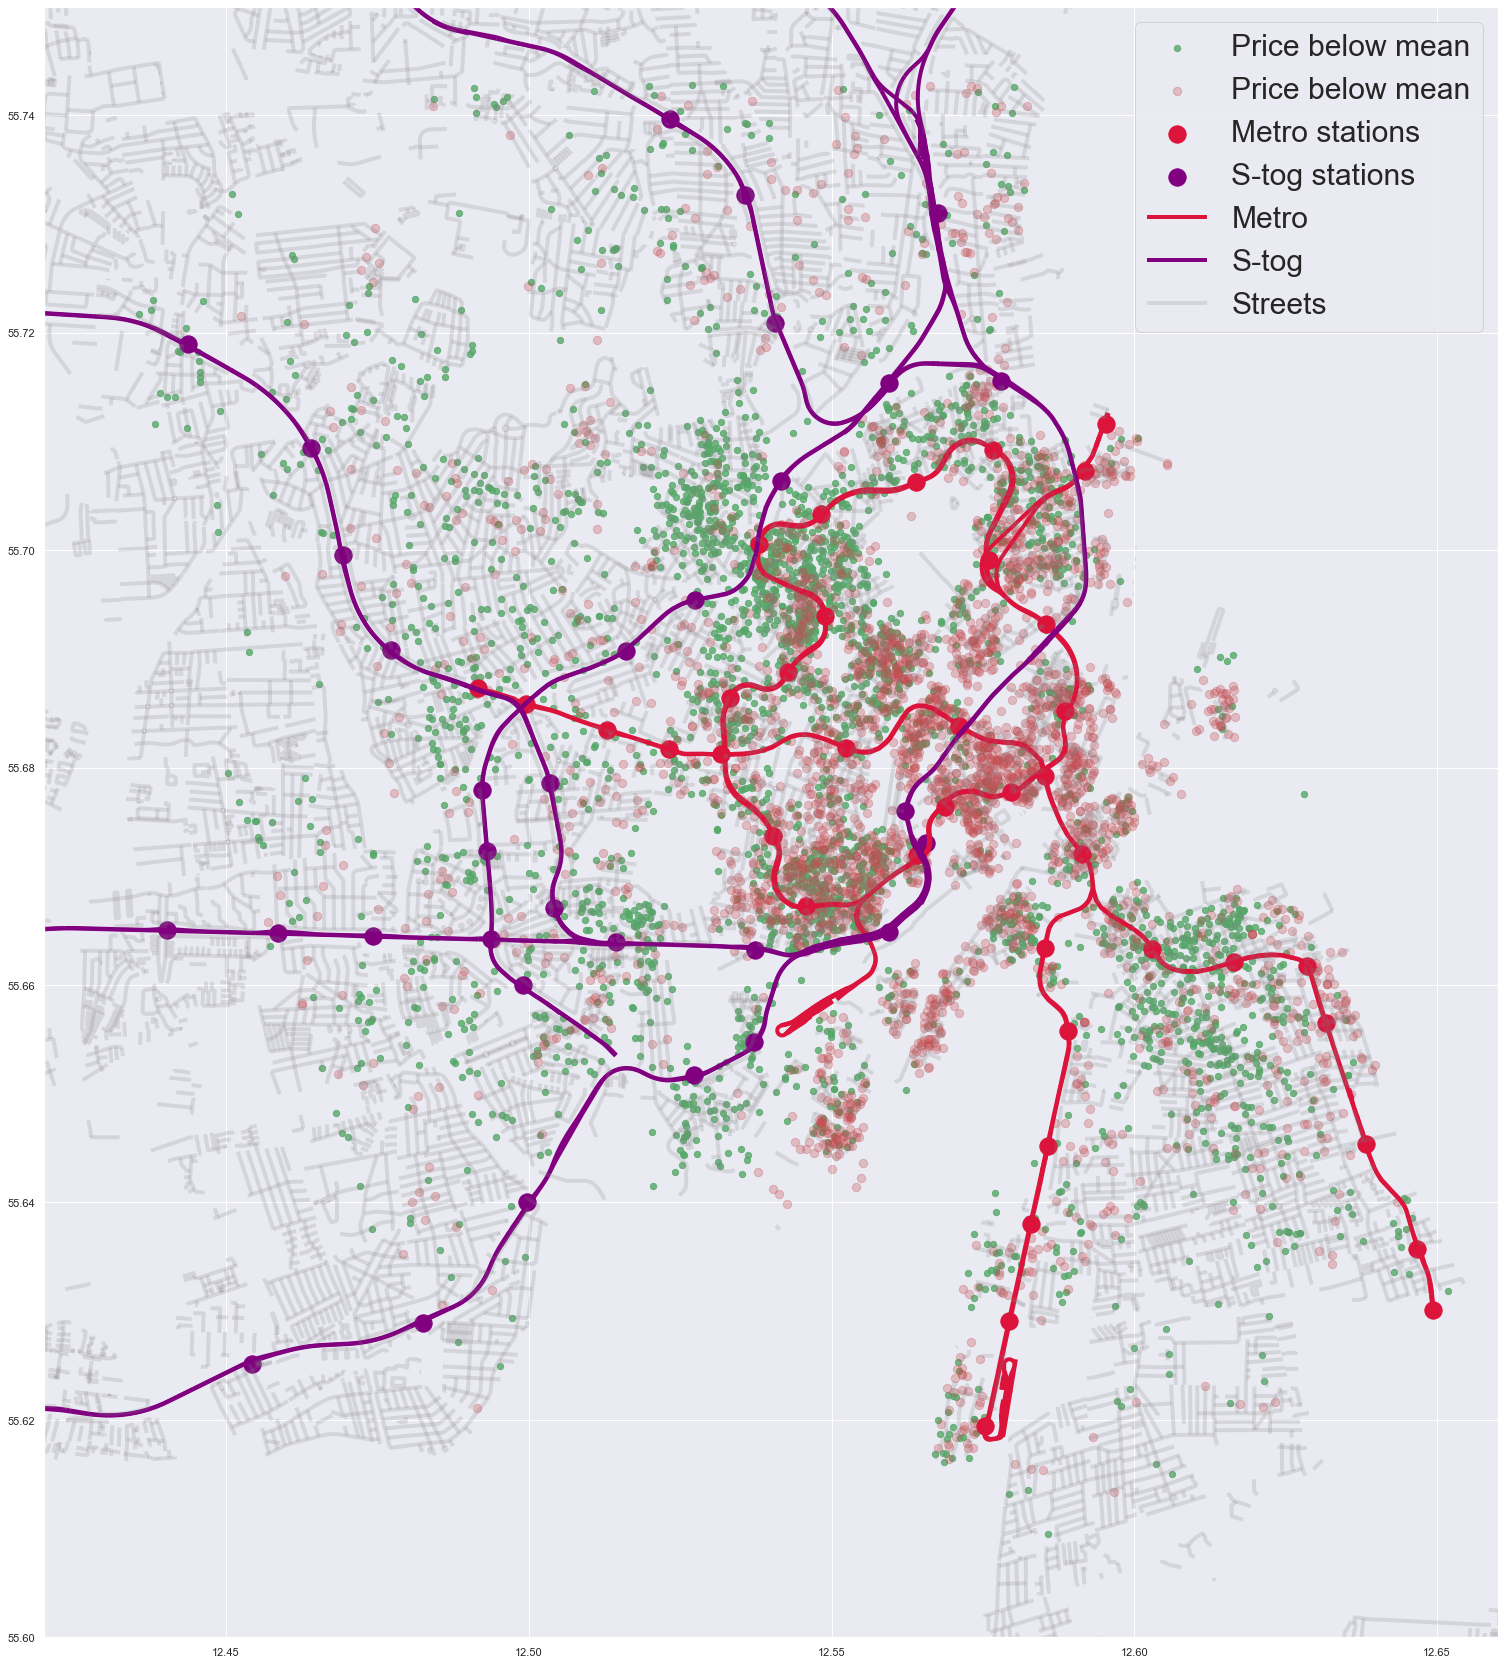

In [328]:
fig, ax = plt.subplots(figsize=(30,30))

ax.set_aspect('equal')
ax.scatter(dataset.longitude[dataset.price < LOW], dataset.latitude[dataset.price < LOW],s=40, c='g', alpha=0.8,label='Price below mean')
ax.scatter(dataset.longitude[dataset.price > HIGH], dataset.latitude[dataset.price > HIGH],s=70, c='r', alpha=0.3,label='Price below mean')
#ax.scatter(dataset.longitude[dataset.price < HIGH & dataset.price > LOW], dataset.latitude[dataset.price < HIGH & dataset.price > LOW],s=70, c='g', alpha=0.8,label='Price below mean')

ax.scatter(metro.Lon,metro.Lat,color = "crimson",s=300,label="Metro stations")
ax.scatter(Stog.Lon,Stog.Lat,color = "purple",s=300,label="S-tog stations")

railways[railways.fclass=='subway'].plot(ax=ax, color='crimson', linewidth=4, label='Metro', alpha=1)
railways[railways.fclass=='light_rail'].plot(ax=ax, color='purple', linewidth=4, label='S-tog', alpha=1)
roads[roads.fclass=='residential'].plot(ax=ax, color='gray', linewidth=4, label='Streets', alpha=0.2)

ax.set_xlim(12.42,12.66)
ax.set_ylim(55.6,55.75)

plt.legend(prop={'size': 30})

**It can be seen that there are some minor signs that there is some formation of a higher priced listings near a station, if looked closely.**
**The most obvious observation from the plot is the fact that most listings in the "Indre By" are priced high. Also, the areas outside of the indre by are genarlly lower priced.***

**For further exploration, lets add the data to the dataset with out the outliers. That way we can really see if having a station nearby affects the price.**

**First, we need to create a dataframe with both the Metros and the S-tog.**

In [290]:
frames = [metro, Stog]
train_stations = pd.concat(frames)
train_stations = train_stations.reset_index()
train_stations = train_stations.drop(["level_0"],axis=1)
train_stations = train_stations.drop(["index"],axis=1)

**Now the minimum distance to next station is calulated for each listing, and added the the dataset.**

In [ ]:
import math 
from math import sqrt

min_dist_from_train = [] 
for i in dataset2.index: 
    temp_dist = [] 
    for j in train_stations.index:  
        dist = sqrt((dataset2.latitude[i]- train_stations.Lat[j])**2 + ((dataset2.longitude[i]- train_stations.Lon[j])**2)) #Píþógoras
        temp_dist.append(dist) 
        min_dist = min(temp_dist) 
    min_dist_from_train.append(min_dist) 
dataset2["min_dist"] = min_dist_from_train

In [ ]:
dataset2["min_dist_meters"] = dataset2["min_dist"]*111*1000
dataset2 = dataset2.drop(['min_dist'],axis=1)

In [319]:
dataset2.head()

host_id neighbourhood  latitude  longitude        room_type  \
id                                                                        
39000504   25580883       Nrrebro  55.68941   12.56260     Private room   
41285362  116485169    Bispebjerg  55.69991   12.53602  Entire home/apt   
48652028  225782385    Bispebjerg  55.70316   12.53422     Private room   
47282476  247828624  Brnshj-Husum  55.71841   12.48477     Private room   
51107459  412918036         Valby  55.65435   12.50645     Private room   

          price  minimum_nights  number_of_reviews  days_since_last_review  \
id                                                                           
39000504     79               1                 28                       9   
41285362    113               1                  0                       6   
48652028    120               1                  0                       6   
47282476    124              90                  0                       6   
51107459    127               7                  2                     390   

          reviews_per_month  total_listings  availability_current_year  \
id                                                                       
39000504           0.770000               2                         38   
41285362           0.903816               1                          0   
48652028           0.903816               1                          0   
47282476           0.903816               1                          0   
51107459           0.150000               1                          0   

          reviews_current_year  p_price  min_dist_meters  
id                                                        
39000504                    22      1.0      1122.682382  
41285362                     0      1.0       239.673770  
48652028                     0      1.0       517.271072  
47282476                     0      1.0      2509.323475  
51107459                     0      1.0      1031.520558

**For the testing, Linear Regression model for the dataset without the outliers is used.**

In [325]:
# Turn categorical and numerical columns into dummy variables in order to evaluate them further on 
features_col2 = ['neighbourhood', 'room_type','number_of_reviews','reviews_per_month','min_dist_meters']
features2 = pd.get_dummies(dataset2[features_col2], columns=['neighbourhood','room_type','reviews_per_month'], drop_first=True)

In [326]:
# Making the training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (features2, target, train_size=0.7)

In [327]:

features2 = pd.get_dummies(dataset2[features_col2], columns=['neighbourhood','room_type','reviews_per_month'], drop_first=True)
# Making the training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (features2, target, train_size=0.7)
# Building a Logistic Regression Model 
x_train_std = x_train.copy()
x_test_std = x_test.copy()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=14000)
lr.fit(x_train_std,y_train)

#Evaluate the performance of the classifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# make predictions from Logistic regression model
y_pred_lr = lr.predict(x_test_std)

# evaluate quality of predictions
print("Accuracy is %f" % accuracy_score(y_test,y_pred_lr))
print("F1-score is %f" % f1_score(y_test,y_pred_lr))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Accuracy is 0.793967
F1-score is 0.883155
Confusion matrix:
[[  60  760]
 [  46 3046]]


**It is observed that there is a some improvement in the model after the minimum distance to next station was added. Previously, the accuracy was 0.76 and f1 score was 0.85.**
**As seen, the accuracy is now 0.79 and the f1 score is 0.88.**

**Therefor, it can be assumed that the presence of a Metro/S-tog station nearby does have some affect on the price, making it higher.**

#  <span style='color:green'> 5. Conclusions </span> <br>

**For the prediction challenge we chose to use two different methods: Logistic Regression and Decision Tree.**

**In the price prediction process, we only used the meaningful variables that might influence our target variable, which are neighbourhood (location), room type and the number of reviews (total and per month). For our models we used both the original dataset consisting the outliers and the dataset after removing the outliers. The outcome after comparing the metrics from both of them was that the prediction models perform better without the outliers. However, the difference is small as the outliers do not have a significant impact on the methods used.  Logistic Regression models are not much impacted due to the presence of outliers because the logistic sigmoid function tapers the outliers. Decision trees are also not sensitive to outliers or noisy data since the partitioning happens based on the proportion of samples within the split ranges and not on absolute values.**

**Since the price is a numerical field and the Logistic regression uses categorical variables, we discretize the target variable into two main categories the low prices (<=price_threshold) and the high prices (>price_threshold), as a price threshold we used the value of the 75% percentile.**

**Significant part to mention is how unbalanced is our dataset 80% in class 1 (low price) and 20% (high price) in class 0. Having this in mind we can not trust the accuracy as it can be misleading, so as estimators for the performance of the models we used the F1-score, pression and recall. In both datasets the Logistic regression performed better than the Decision tree predicting and classifying the low price and high prices giving a F1-score in the range of 0.80-0.85, precision 78%-80% and recall 80%-97% which a very good performance.**

**In the exploratory part, the group analysed if the presence of a Metro- or S-tog station affects the price. The coordinates for each station were downloaded and put together in the same data frame. From there, the nearest station for each listing was found and added to the dataset without the outliers. The prediction model with the linear regression was performed again with the additional data. The model was, beforehand, rather good, with an accuracy of 0.76 and an f1 score of 0.85. With the added data, the model improved, with an accuracy of 0.79 and an f1 score of 0.88.**

**In conclusion, having a nearby Metro- or S-tog station makes it more valuable and, therefore, more expensive. The model improved slightly and predicted with good accuracy whether a listing was priced high or low. The results could be foreseen, as having a nearby Metro- or S-tog station makes the listing more appealing to Airbnb customers, especially in a city that relies heavily on public transportation.**

#  <span style='color:green'> 6. Contribution </span> <br>

<span style='color:red'> 1. Introduction and Data Analysis and Visualization - Arlinda and Simona </span> <br>

<span style='color:red'> 2. Prediction challange - Arlinda </span> <br>

<span style='color:red'> 3. Exploratory Component - Bergur and Alex </span> <br>

<span style='color:red'> 4. Conclusion - All group members </span> <br>